# Exercises for Introduction to Python for Data Science

Week 09 - Matplotlib

Matthias Feurer and Andreas Bender  
2025-01-07

In this sheet we will get hands‑on practice with **Matplotlib**. The
four exercises build on one another: we start with a very simple line
plot and gradually move towards multi‑panel figures and
publication‑ready styling.

**Learning goals**

-   Create basic line and histogram plots.
-   Add error bars, legends, axis labels, titles and annotations.
-   Adjust axis limits, tick formatting and log scales.
-   Combine several axes in the same figure.

# Common imports

Run this cell once; it is reused in all subsequent exercises.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')  # make sure we start from a clean state

# Exercise 1 – *Simple line plot*

Create a line plot of the function (f(x)=(x)) for (x ) sampled at 50
points. Then:

1.  Name the x‑axis “x” and the y‑axis “sin(x)”.
2.  Give the plot the title *Sine wave*.
3.  Make sure a grid is visible.

A skeleton is provided — fill in the `<TODO>` parts.

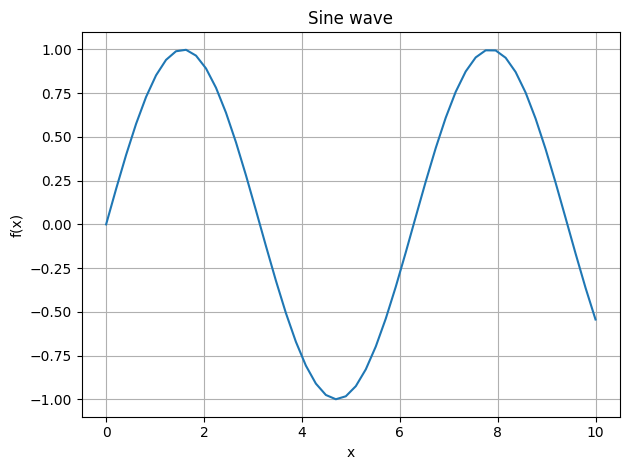

In [18]:
# Exercise 1 -- your code here
x = np.linspace(0, 10, 50)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)             # line plot
ax.set(xlabel="x", ylabel="f(x)", title= "Sine wave")        
ax.grid()                  # add a grid
fig.tight_layout()


# Exercise 2 – *Histogram and density*

1.  Draw 1000 samples from a normal distribution with mean 0 and
    standard deviation 1. Plot a histogram with 30 equal‑width bins
    *and* the corresponding kernel density estimate (KDE) in the same
    axes. Use the `density=True` argument for the histogram so that both
    curves are on the same scale.

2.  In a second step add the cumulative histogram (CDF) of the same data
    on a *secondary y‑axis* on the right.

3.  Add a legend that cleanly distinguishes the PDF (hist + KDE) from
    the CDF.

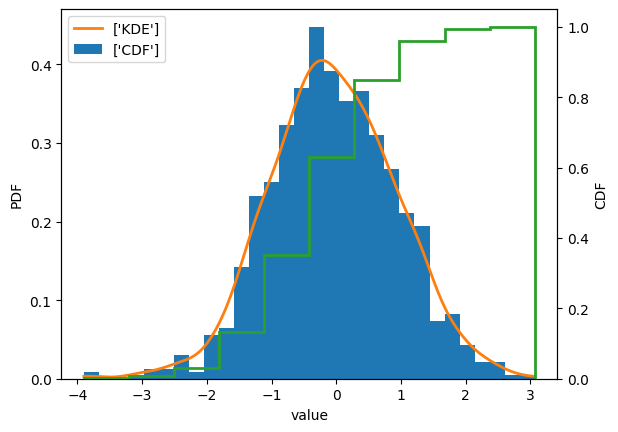

In [69]:
# Exercise 2 -- your code here
rng = np.random.default_rng(0)
data = rng.normal(0,1,1000)

fig, ax1 = plt.subplots()

# # (a) histogram + KDE
counts, bins, patches = ax1.hist(data, bins=30, density=True)

# # KDE using a simple Gaussian kernel
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
xs = np.linspace(bins.min(), bins.max(), 301)
ax1.plot(xs, kde(xs), lw=2, label= "KDE")
ax1.set_xlabel("value")
ax1.set_ylabel("PDF")

# # (b) cumulative histogram on secondary axis
ax2 = ax1.twinx()
ax2.hist(data,density=True, cumulative=True, histtype='step', lw=2, label="CDF", color="tab:green")
ax2.set_ylabel("CDF")

# # (c) combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(labels=[labels1,labels2], loc="upper left")

# fig.tight_layout()
# plt.show()

# Exercise 3 – *Scatter plot with error bars*

We collected (fabricated) body‑height and body‑mass measurements of 20
individuals, each with a small measurement error.

Plot the data as a *scatter plot* with x‑error bars (height error) and
y‑error bars (weight error). Use triangles (`marker='^'`) and a single
colour of your choice. Label the axes and place the legend in the lower
right corner. Try to make the figure look tidy (`fig.tight_layout()` and
reasonable axis limits).

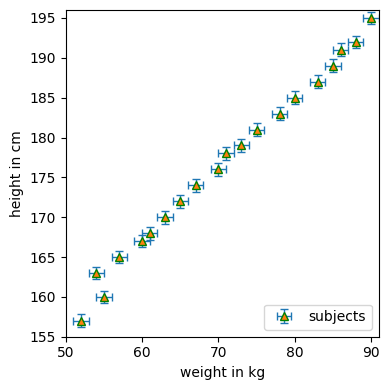

In [93]:
# Exercise 3 -- your code here

height_cm = np.array([157,160,163,165,167,168,170,172,174,176,
                       178,179,181,183,185,187,189,191,192,195])
weight_kg = np.array([52,55,54,57,60,61,63,65,67,70,
                       71,73,75,78,80,83,85,86,88,90])
height_err = 0.8
weight_err = 1.0

fig, ax = plt.subplots(figsize=(4,4))
ax.errorbar(weight_kg, height_cm, xerr=weight_err, yerr=height_err, fmt="^",
             mec='green', mfc='tab:orange', elinewidth=1, capsize=3,
             label="subjects")
ax.set_xlabel("weight in kg")  #Label the x-axis
ax.set_ylabel("height in cm")       #Label the y-axis
ax.legend(loc = "lower right")       #Add a legend in the lower right corner
ax.set_xlim(50,91)#Apply reasonable x-axis limit
ax.set_ylim(155,196)       #Apply reasonable y-axis limit
# ax.grid(True, linestyle=':')
fig.tight_layout()       #Make the figure look tidy
# plt.show()

# Exercise 4 – *Multiple subplots & styles*

1.  Generate two synthetic data sets:

-   `normal` – 500 samples from a normal distribution with mean 5 and
    standard deviation 1.
-   `lognormal` – 500 samples from a log‑normal distribution with *the
    same* mean and standard deviation (hint: use
    `np.random.lognormal(mean, sigma)` – you have to find suitable
    *mean* and *sigma* for the underlying normal – no need to be exact).

1.  Create a *figure with two rows* (`nrows=2, ncols=1`) that shares the
    x‑axis. For the upper subplot draw a histogram of `normal`. For the
    lower subplot draw a histogram of `lognormal` but *on a logarithmic
    x scale*.

2.  Write the code such that the *first* plot uses Matplotlib’s default
    style, while before drawing the *second* plot you switch to the
    `"ggplot"` style sheet using `plt.style.use("ggplot")`.

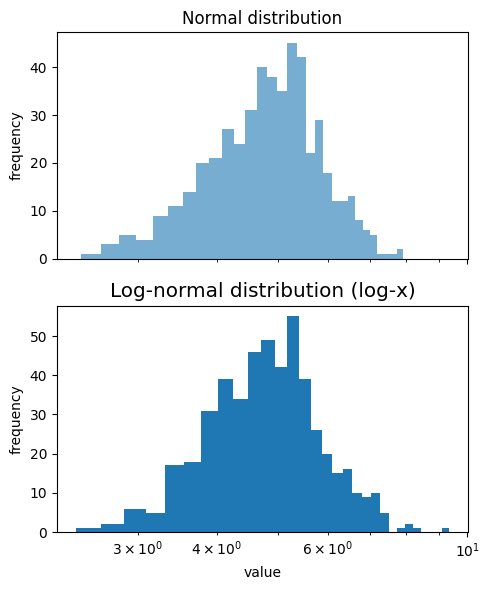

In [126]:
# Exercise 4 -- your code here
rng = np.random.default_rng(42)
normal = rng.normal(5,1,500)
lognormal = rng.lognormal(1.6,0.2,500)

plt.style.use('default')
fig, (ax_top, ax_bottom) = plt.subplots(2,1, figsize=(5,6), sharex=True)

ax_top.hist(normal, bins=30, color="tab:blue", alpha=0.6)
ax_top.set_title("Normal distribution")
ax_top.set_ylabel("frequency")

plt.style.use("ggplot")
ax_bottom.hist(lognormal, bins=30)
ax_bottom.set_title("Log‑normal distribution (log‑x)")
ax_bottom.set_xlabel("value")
ax_bottom.set_ylabel("frequency")
ax_bottom.set_xscale("log")#Set logarithmic x scale

fig.tight_layout()
plt.show()

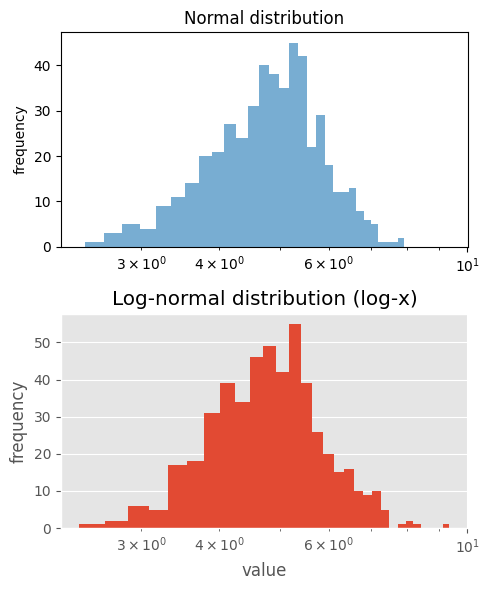

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Daten
rng        = np.random.default_rng(42)
normal     = rng.normal(5,    1,   500)
lognormal  = rng.lognormal(1.6,  0.2, 500)

fig = plt.figure(figsize=(5, 6))

# 1) Oberen Subplot im Default-Stil anlegen und zeichnen
plt.style.use('default')
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(normal,
         bins=30,
         color='tab:blue',
         alpha=0.6)
ax1.set_title("Normal distribution")
ax1.set_ylabel("frequency")

# 2) Vor dem zweiten Subplot auf ggplot umschalten
plt.style.use('ggplot')
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.hist(lognormal, bins=30)
ax2.set_title("Log-normal distribution (log-x)")
ax2.set_xlabel("value")
ax2.set_ylabel("frequency")
ax2.set_xscale("log")

plt.tight_layout()
plt.show()